##Importing Libraries and dataset

In [21]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
dataset=pd.read_csv("/content/drive/My Drive/Dataset/new_appdata10.csv");

##Data Preprocessing

In [22]:
response=dataset['enrolled'];
dataset.drop(columns=['enrolled','user'],axis=1,inplace=True);

In [23]:
from sklearn.model_selection import train_test_split;
X_train,X_test,y_train,y_test=train_test_split(dataset,response,test_size=0.2)

In [24]:
from sklearn.preprocessing import StandardScaler;
sc=StandardScaler();
sc_X_train=pd.DataFrame(sc.fit_transform(X_train));
sc_X_test =pd.DataFrame(sc.transform(X_test));
sc_X_train.columns=X_train.columns;
sc_X_test.columns=X_test.columns;

##Model Building

In [25]:
#Confusion Matrix for Binary Classification Problem
from sklearn.metrics import confusion_matrix;
def heatmap_confusion_matrix(y_true,y_pred):
  cm=confusion_matrix(y_true,y_pred);
  group_names = ['True Neg','False Pos','False Neg','True Pos'];
  group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()];
  group_percent = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)];
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percent)];
  labels = np.asarray(labels).reshape(2,2);
  plt.figure(figsize=(6,4));
  sns.set(font_scale=1.2);
  sns.heatmap(cm,annot=labels,fmt='',cmap='Blues');
  plt.xlabel("Predicted Value");
  plt.ylabel("Actual Value");
  plt.show();

In [26]:
#Metrics for Classification Problem
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score;
def classification_metrics(y_true,y_pred):
  print("Accuracy Score  : ",round(accuracy_score(y_true,y_pred),3));
  print("Precision Score : ",round(precision_score(y_true,y_pred),3));
  print("Recall Score    : ",round(recall_score(y_true,y_pred),3));
  print("F1 Score        : ",round(f1_score(y_true,y_pred),3));

In [27]:
#Apply K-fold Cross Validation for Classification Problem
from sklearn.model_selection import cross_val_score;
def k_fold_cross_validation(model,train_data,train_response,number):
  accuracies=cross_val_score(estimator=model,X=train_data,y=train_response,cv=number);
  print("Mean Accuracy of Model : ",round(accuracies.mean(),3))
  print("Standard Deviation is  : ",round(accuracies.std(),3));

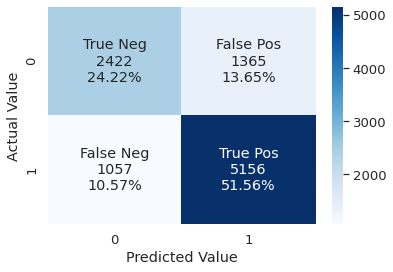

Accuracy Score  :  0.758
Precision Score :  0.791
Recall Score    :  0.83
F1 Score        :  0.81
Mean Accuracy of Model :  0.756
Standard Deviation is  :  0.01


In [28]:
#Check Logistic Regression Model
from sklearn.linear_model import LogisticRegression;
log_classifier=LogisticRegression(penalty='l1',solver='liblinear');
log_classifier.fit(sc_X_train,y_train);
log_y_pred=log_classifier.predict(sc_X_test);
heatmap_confusion_matrix(y_test,log_y_pred);
classification_metrics(y_test,log_y_pred);
k_fold_cross_validation(log_classifier,X_train,y_train,10);

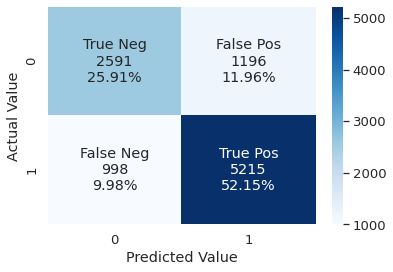

Accuracy Score  :  0.781
Precision Score :  0.813
Recall Score    :  0.839
F1 Score        :  0.826
Mean Accuracy of Model :  0.774
Standard Deviation is  :  0.006


In [29]:
#Checking XGBoost Algorithm
from xgboost import XGBClassifier;
boost_classifier=XGBClassifier();
boost_classifier.fit(X_train,y_train);
boost_y_pred=boost_classifier.predict(X_test);
heatmap_confusion_matrix(y_test,boost_y_pred);
classification_metrics(y_test,boost_y_pred);
k_fold_cross_validation(boost_classifier,X_train,y_train,10);

##Model Tuning

In [30]:
parameter={'C':[0.01,0.1,1,10,100],
           'penalty':['l1','l2']};
from sklearn.model_selection import GridSearchCV;
grid=GridSearchCV(estimator=log_classifier,param_grid=parameter,scoring='accuracy',n_jobs=-1);
grid.fit(X_train,y_train);
print("Best Parameter : ",grid.best_params_);
print("Best Accuracy  : ",round(grid.best_score_,3));

Best Parameter :  {'C': 10, 'penalty': 'l1'}
Best Accuracy  :  0.755


In [31]:
parameter={'C':[2,5,10,20,50],
           'penalty':['l1','l2']};
from sklearn.model_selection import GridSearchCV;
grid_1=GridSearchCV(estimator=log_classifier,param_grid=parameter,scoring='accuracy',n_jobs=-1);
grid_1.fit(X_train,y_train);
print("Best Parameter : ",grid_1.best_params_);
print("Best Accuracy  : ",round(grid_1.best_score_,3));

Best Parameter :  {'C': 10, 'penalty': 'l1'}
Best Accuracy  :  0.755


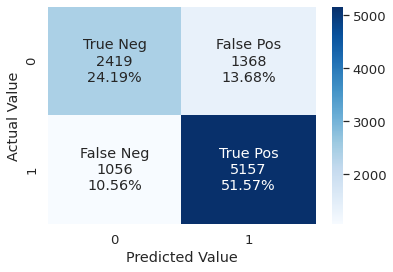

In [32]:
y_grid=grid_1.predict(X_test);
heatmap_confusion_matrix(y_test,y_grid);